In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./data/breast_cancer.csv",sep=",")

In [ ]:
df

In [3]:
print(df.columns)
print("**" * 50)
df.info()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-n

In [4]:
df.drop(columns=[df.columns[0],df.columns[-1]],axis=1,inplace=True)

In [5]:
df.diagnosis = df.diagnosis.replace({'M':1,'B':0})

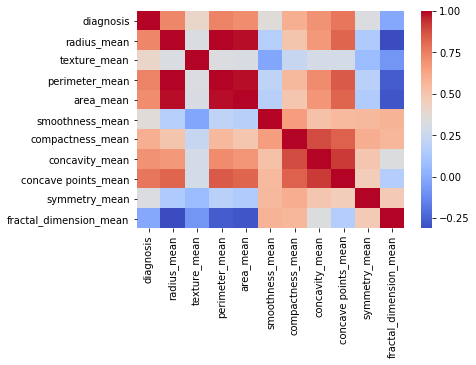

In [6]:
sns.heatmap(df.iloc[:,0:11].corr(),annot=False, cmap="coolwarm")
plt.show()

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
Y = df.iloc[0:,0]
#Considering first 10 columns discarding rest because feature seems to be repeated.
X = df.iloc[0:,1:11]

# removing "texture_mean" since 
X.drop(columns=[df.columns[2]],axis=1,inplace=True)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split as tts, GridSearchCV, cross_val_score

In [24]:
X_train, X_test, y_train, y_test = tts(X,Y,random_state = 50, test_size = 0.25)

In [25]:
print("X_train size :",X_train.shape[0])
print("X_test size :",X_test.shape[0])

X_train size : 426
X_test size : 143


In [26]:
knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.8951048951048951

In [28]:
params = {"n_neighbors":np.arange(1,10,1), "metric":["euclidean", "minkowski", "jaccard", "cosine"]}

In [29]:
knn_cv = GridSearchCV(estimator=knn, param_grid=params, cv = 10)

In [30]:
knn_cv.fit(X,Y)

/Users/ashisht/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'minkowski', 'jaccard',
                                    'cosine'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
knn_cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 6}

In [18]:
knn_cv.best_score_

0.8927943760984183

In [19]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [31]:
Y_pred = knn_cv.predict(X_test)

In [32]:
print(Y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0]


## Taking one row and changing the value for predicting the output

In [21]:
print(X.iloc[5:6,:])
new_X = X.iloc[5:6,:] * 1.5
print(new_X)

   radius_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
5        12.45           82.57      477.1           0.1278              0.17   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  
5          0.1578              0.08089         0.2087                 0.07613  
   radius_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
5       18.675         123.855     715.65           0.1917             0.255   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  
5          0.2367             0.121335        0.31305                0.114195  


In [22]:
if knn_cv.predict(new_X)[0] == 1 :
    print("Malignant")
else:
    print("Benign")

Malignant


In [23]:
new_X = X.iloc[5:6,:] / 1.5
if knn_cv.predict(new_X)[0] == 1 :
    print("Malignant")
else:
    print("Benign")

Benign
